In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import math 
import seaborn as sea
import statistics
import warnings
from scipy import stats
from numpy import percentile
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_boston
import matplotlib
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso



In [2]:
path = "BankChurnersFNum.csv"
df = pd.read_csv(path)
del df["Unnamed: 0"]
del df["CLIENTNUM"]
del df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
del df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
"""del df["Unnamed: 0"]
del df["Unnamed: 0"]
del df["Unnamed: 0"]
del df["Unnamed: 0"]
del df["Unnamed: 0"]
del df["Unnamed: 0"]"""

#x = load_boston()
#df = pd.DataFrame(x.data, columns = x.feature_names)
X = df.drop("Attrition_Flag",1)    #Feature Matrix
y = df["Attrition_Flag"]           #Target Variable
df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,0.409091,1.0,0.4,0.2,0.5,0.25,0.0,0.534884,0.4,0.166667,0.333333,0.077747,0.495431,0.079970,0.972136,0.040813,0.118644,0.604136,0.311311
1,1.0,0.363636,1.0,1.0,0.0,0.0,1.00,0.0,0.418605,0.8,0.500000,0.333333,0.160522,0.582837,0.152928,0.550310,0.048793,0.271186,0.481536,0.217217
2,1.0,0.704545,0.0,0.4,0.2,0.5,0.00,0.0,0.813953,0.8,0.333333,0.333333,0.030162,0.270163,0.050792,0.828173,0.074848,0.161017,0.430576,0.279279
3,1.0,0.431818,0.0,0.4,0.2,0.5,1.00,0.0,0.558140,1.0,0.166667,0.333333,0.393972,0.459674,0.385652,0.654799,0.049216,0.093220,0.650665,0.080080
4,1.0,0.477273,1.0,0.2,1.0,1.0,0.50,0.0,0.674419,0.8,0.333333,0.000000,0.590751,0.715137,0.555617,0.608359,0.047168,0.144068,0.665436,0.086086


Метод фильтрации

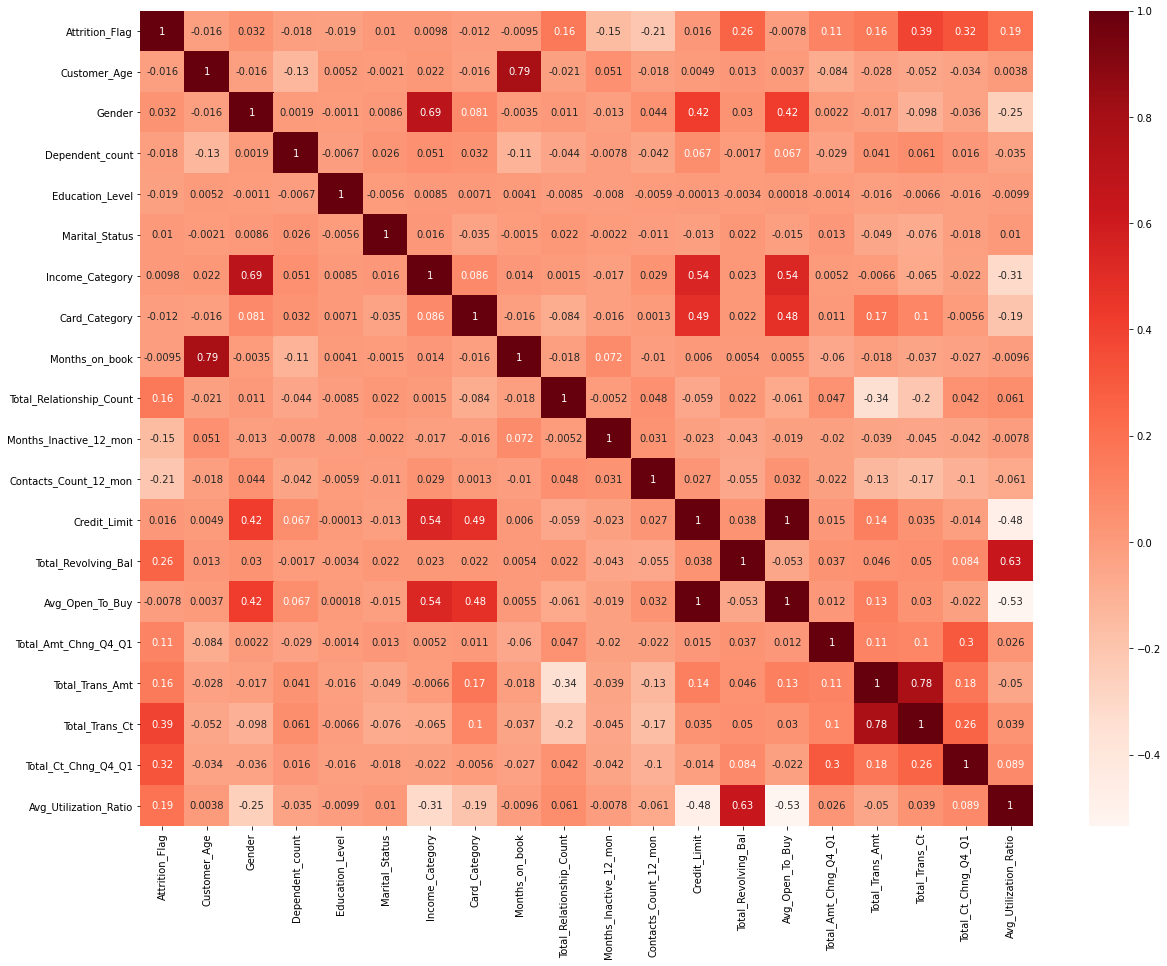

In [3]:
#Using Pearson Correlation
mpl.figure(figsize=(20,15))
cor = df.corr()
sea.heatmap(cor, annot=True, cmap=mpl.cm.Reds)
mpl.show()

In [4]:
#Correlation with output variable
cor_target = abs(cor["Attrition_Flag"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Attrition_Flag         1.000000
Total_Trans_Ct         0.389972
Total_Ct_Chng_Q4_Q1    0.320583
Name: Attrition_Flag, dtype: float64

In [5]:
print(df[["Total_Trans_Ct","Total_Ct_Chng_Q4_Q1"]].corr())

                     Total_Trans_Ct  Total_Ct_Chng_Q4_Q1
Total_Trans_Ct             1.000000             0.258599
Total_Ct_Chng_Q4_Q1        0.258599             1.000000


In [6]:
X = df[["Total_Trans_Ct","Total_Ct_Chng_Q4_Q1"]]
Y = df["Attrition_Flag"]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
#
LR_fit = LR.fit(X_train, Y_train)
KNN_fit = KNN.fit(X_train, Y_train)
NB_fit = NB.fit(X_train, Y_train)
LSVM_fit = LSVM.fit(X_train, Y_train)
NLSVM_fit = NLSVM.fit(X_train, Y_train)
DT_fit = DT.fit(X_train, Y_train)
RF_fit = RF.fit(X_train, Y_train)
#
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
LSVM_pred = LSVM_fit.predict(X_test)
NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)
#
print("Logistic Regression is %f percent accurate" % (accuracy_score(LR_pred, Y_test)*100))
print(confusion_matrix(Y_test, LR_pred))  
print ('Report : ') 
print (classification_report(Y_test, LR_pred))
#print ('Accuracy Score :',accuracy_score(Y_test, LR_pred))
#
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, Y_test)*100))
print(confusion_matrix(Y_test, KNN_pred))  
print ('Report : ') 
print (classification_report(Y_test, KNN_pred))
#
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, Y_test)*100))
print(confusion_matrix(Y_test, NB_pred))  
print ('Report : ') 
print (classification_report(Y_test, NB_pred))
#
print("Linear SVMs is %f percent accurate" % (accuracy_score(LSVM_pred, Y_test)*100))
print(confusion_matrix(Y_test, LSVM_pred))  
print ('Report : ') 
print (classification_report(Y_test, LSVM_pred))
#
print("Non Linear SVMs is %f percent accurate" % (accuracy_score(NLSVM_pred, Y_test)*100))
print(confusion_matrix(Y_test, NLSVM_pred))  
print ('Report : ') 
print (classification_report(Y_test, NLSVM_pred))
#
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, Y_test)*100))
print(confusion_matrix(Y_test, DT_pred))  
print ('Report : ') 
print (classification_report(Y_test, DT_pred))
#
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, Y_test)*100))
print(confusion_matrix(Y_test, RF_pred))  
print ('Report : ') 
print (classification_report(Y_test, RF_pred))

Logistic Regression is 83.763838 percent accurate
[[  67  255]
 [  53 1522]]
Report : 
              precision    recall  f1-score   support

         0.0       0.56      0.21      0.30       322
         1.0       0.86      0.97      0.91      1575

    accuracy                           0.84      1897
   macro avg       0.71      0.59      0.61      1897
weighted avg       0.81      0.84      0.81      1897

KNN is 83.447549 percent accurate
[[ 140  182]
 [ 132 1443]]
Report : 
              precision    recall  f1-score   support

         0.0       0.51      0.43      0.47       322
         1.0       0.89      0.92      0.90      1575

    accuracy                           0.83      1897
   macro avg       0.70      0.68      0.69      1897
weighted avg       0.82      0.83      0.83      1897

Naive Bayes is 83.658408 percent accurate
[[ 144  178]
 [ 132 1443]]
Report : 
              precision    recall  f1-score   support

         0.0       0.52      0.45      0.48       322


Метод обертки

In [9]:
#Adding constant column of ones, mandatory for sm.OLS model

X = df.drop("Attrition_Flag",1)    #Feature Matrix
y = df["Attrition_Flag"]           #Target Variable

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                        2.102474e-01
Customer_Age                 7.739195e-01
Gender                       1.248602e-18
Dependent_count              5.155773e-07
Education_Level              4.759602e-02
Marital_Status               3.041842e-05
Income_Category              6.271786e-04
Card_Category                1.622867e-03
Months_on_book               2.879869e-01
Total_Relationship_Count     8.355657e-82
Months_Inactive_12_mon       3.125580e-47
Contacts_Count_12_mon        1.478565e-54
Credit_Limit                 2.102474e-01
Total_Revolving_Bal          2.102474e-01
Avg_Open_To_Buy              2.102474e-01
Total_Amt_Chng_Q4_Q1         3.542650e-01
Total_Trans_Amt             5.315819e-112
Total_Trans_Ct               0.000000e+00
Total_Ct_Chng_Q4_Q1          3.715573e-89
Avg_Utilization_Ratio        6.578904e-01
dtype: float64

In [10]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


In [11]:
X = df[['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]
Y = df["Attrition_Flag"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
#
LR_fit = LR.fit(X_train, Y_train)
KNN_fit = KNN.fit(X_train, Y_train)
NB_fit = NB.fit(X_train, Y_train)
LSVM_fit = LSVM.fit(X_train, Y_train)
NLSVM_fit = NLSVM.fit(X_train, Y_train)
DT_fit = DT.fit(X_train, Y_train)
RF_fit = RF.fit(X_train, Y_train)
#
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
LSVM_pred = LSVM_fit.predict(X_test)
NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)
#
print("Logistic Regression is %f percent accurate" % (accuracy_score(LR_pred, Y_test)*100))
print(confusion_matrix(Y_test, LR_pred))  
print ('Report : ') 
print (classification_report(Y_test, LR_pred))
#print ('Accuracy Score :',accuracy_score(Y_test, LR_pred))
#
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, Y_test)*100))
print(confusion_matrix(Y_test, KNN_pred))  
print ('Report : ') 
print (classification_report(Y_test, KNN_pred))
#
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, Y_test)*100))
print(confusion_matrix(Y_test, NB_pred))  
print ('Report : ') 
print (classification_report(Y_test, NB_pred))
#
print("Linear SVMs is %f percent accurate" % (accuracy_score(LSVM_pred, Y_test)*100))
print(confusion_matrix(Y_test, LSVM_pred))  
print ('Report : ') 
print (classification_report(Y_test, LSVM_pred))
#
print("Non Linear SVMs is %f percent accurate" % (accuracy_score(NLSVM_pred, Y_test)*100))
print(confusion_matrix(Y_test, NLSVM_pred))  
print ('Report : ') 
print (classification_report(Y_test, NLSVM_pred))
#
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, Y_test)*100))
print(confusion_matrix(Y_test, DT_pred))  
print ('Report : ') 
print (classification_report(Y_test, DT_pred))
#
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, Y_test)*100))
print(confusion_matrix(Y_test, RF_pred))  
print ('Report : ') 
print (classification_report(Y_test, RF_pred))

Logistic Regression is 90.089615 percent accurate
[[ 187  144]
 [  44 1522]]
Report : 
              precision    recall  f1-score   support

         0.0       0.81      0.56      0.67       331
         1.0       0.91      0.97      0.94      1566

    accuracy                           0.90      1897
   macro avg       0.86      0.77      0.80      1897
weighted avg       0.90      0.90      0.89      1897

KNN is 88.929889 percent accurate
[[ 160  171]
 [  39 1527]]
Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.48      0.60       331
         1.0       0.90      0.98      0.94      1566

    accuracy                           0.89      1897
   macro avg       0.85      0.73      0.77      1897
weighted avg       0.88      0.89      0.88      1897

Naive Bayes is 88.455456 percent accurate
[[ 204  127]
 [  92 1474]]
Report : 
              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65       331


RFE

In [20]:
X = df.drop("Attrition_Flag",1)    #Feature Matrix
y = df["Attrition_Flag"]           #Target Variable

warnings.simplefilter('ignore')

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)

#no of features
nof_list=np.arange(1,20)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
X3 = df[selected_features_rfe]
###
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
#
LR_fit = LR.fit(X_train, y_train)
KNN_fit = KNN.fit(X_train, y_train)
NB_fit = NB.fit(X_train, y_train)
LSVM_fit = LSVM.fit(X_train, y_train)
NLSVM_fit = NLSVM.fit(X_train, y_train)
DT_fit = DT.fit(X_train, y_train)
RF_fit = RF.fit(X_train, y_train)
#
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
LSVM_pred = LSVM_fit.predict(X_test)
NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)
#
print("Logistic Regression is %f percent accurate" % (accuracy_score(LR_pred, y_test)*100))
print(confusion_matrix(y_test, LR_pred))  
print ('Report : ') 
print (classification_report(y_test, LR_pred))
#print ('Accuracy Score :',accuracy_score(Y_test, LR_pred))
#
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, y_test)*100))
print(confusion_matrix(y_test, KNN_pred))  
print ('Report : ') 
print (classification_report(y_test, KNN_pred))
#
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, y_test)*100))
print(confusion_matrix(y_test, NB_pred))  
print ('Report : ') 
print (classification_report(y_test, NB_pred))
#
print("Linear SVMs is %f percent accurate" % (accuracy_score(LSVM_pred, y_test)*100))
print(confusion_matrix(y_test, LSVM_pred))  
print ('Report : ') 
print (classification_report(y_test, LSVM_pred))
#
print("Non Linear SVMs is %f percent accurate" % (accuracy_score(NLSVM_pred, y_test)*100))
print(confusion_matrix(y_test, NLSVM_pred))  
print ('Report : ') 
print (classification_report(y_test, NLSVM_pred))
#
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, y_test)*100))
print(confusion_matrix(y_test, DT_pred))  
print ('Report : ') 
print (classification_report(y_test, DT_pred))
#
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, y_test)*100))
print(confusion_matrix(y_test, RF_pred))  
print ('Report : ') 
print (classification_report(y_test, RF_pred))

Optimum number of features: 19
Score with 19 features: 0.374926
Logistic Regression is 90.337316 percent accurate
[[ 262  217]
 [  58 2309]]
Report : 
              precision    recall  f1-score   support

         0.0       0.82      0.55      0.66       479
         1.0       0.91      0.98      0.94      2367

    accuracy                           0.90      2846
   macro avg       0.87      0.76      0.80      2846
weighted avg       0.90      0.90      0.90      2846

KNN is 89.177793 percent accurate
[[ 233  246]
 [  62 2305]]
Report : 
              precision    recall  f1-score   support

         0.0       0.79      0.49      0.60       479
         1.0       0.90      0.97      0.94      2367

    accuracy                           0.89      2846
   macro avg       0.85      0.73      0.77      2846
weighted avg       0.88      0.89      0.88      2846

Naive Bayes is 86.683064 percent accurate
[[ 285  194]
 [ 185 2182]]
Report : 
              precision    recall  f1-score  